# 决策树

决策树是一个非参数学习算法，既可以解决分类问题，又可以解决回归问题（叶节点均值作为预测值），天然可以处理多分类问题

决策树算法包括：**特征选择、决策树的生成、剪枝**，三个步骤

## 特征选择

选择合适的特征来划分特征空间，提高学习效率

**常用的特征选择准则：信息增益率或信息增益比**

熵（entropy）：随机变量不确定性的度量  

随机变量X的熵为：$H(X)=- \sum_{i=1}^n P_i log(P_i)$,其中$P_i$是随机变量X的概率分布   

熵越大，随机变量X的不确定性越大，且熵只与X的分布有关


X给定条件下Y的条件熵（conditional entropy）H（Y|X),也可理解为X给定条件下Y的条件概率分布的熵对X的数学期望
$$H(Y|X)=\sum_{i=1}^n P_i H(Y|X=x_i) $$

当熵和条件熵中的概率又概率估计得到时，称之为经验熵和经验条件熵

### 信息增益

信息增益：特征 A 对训练集 D 的信息增益为$g(D,A)$,定义为集合 D 的经验熵和在A 条件下的经验条件熵之差 $$g(D,A)=H(D)-H(D|A)$$

熵 H(Y) 与条件熵 H(Y|X) 之差称为互信息，决策树的信息增益等价于互信息

信息增益准则的特征选择方法是：选取信息增益最大的特征

### 信息增益比

$$g_R(D,A)=\frac{g(D,A)}{H(D)}$$

选择方法同上

## 决策树生成

ID3算法：在决策树的各个节点上应用信息增益准则进行特征选择，递归地构建决策树  

C4.5算法： 在决策树的各个节点上应用信息增益比进行特征选择，递归地构建决策树


## 剪枝

定义损失函数：
$C_i（T）=\sum_{t=1}^m N_tH_t(T)+i|T|
，其中树T的叶节点个数为m，t是树T的叶节点，该叶节点有 N_t 个样本$ 

设一组叶节点回缩至其父节点之前与之后的整体树分别为$T_B$和$T_A$,若$C_i(T_A)\leq C_i(T_B)$ 则进行剪枝，即将父节点变为新的叶节点

## CART算法

CART 由特征选择、树的生成、剪枝组成

对回归树采用平方误差最小的准则，具体地：选择一个切分点，对切分点前后的区域分别取均值，使得切点与均值之差的平方和最小，对每个区域重复上述划分，直至满足停止条件

对分类树采用基尼系数选择最优特征  
基尼系数：$Gini（p）=1-\sum_{i=1}^k p_i^2$,k个类  
$Gini(D)=1-\sum_{i=1}^k \frac{|C_i|}{|D|}$  ,|D|表示集合D 的样本数，其他的|.|同理   
$Gini(D,A)=\frac{|D_1|}{|D|}Gini(D_1)+\frac{|D_2|}{|D|}Gini(D_2)$  
选择的是基尼系数最小的特征  
算法停止条件是节点中样本个数小于一定值或者Gini系数小于一定值

CART剪枝：自下而上的进行剪枝，并对结果通过交叉验证选取最优（平方误差最小或基尼系数最小）

# sklearn封装的决策树

sklearn封装的决策树主要是CART算法，其中包括：分类[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)、回归[DecisionTreeRegression](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

DecisionTreeClassifier 默认采用Gini系数，可选entropy（熵）  
DecisionTreeRegression 默认采用均方误差最小，可选 MAE

In [7]:
from sklearn import tree

In [8]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf=tree.DecisionTreeClassifier()
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
clf1=tree.DecisionTreeClassifier()
clf1.fit(iris.data,iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
import graphviz

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None)

In [13]:
graph = graphviz.Source(dot_data)

In [15]:
>>> from sklearn import tree
>>> X = [[0, 0], [2, 2]]
>>> y = [0.5, 2.5]
>>> clf2 = tree.DecisionTreeRegressor()
>>> clf2 = clf2.fit(X, y)
>>> clf2.predict([[1, 1]])

array([0.5])

In [21]:
clf2.tree_.feature

array([ 1, -2, -2], dtype=int64)

## 多值输出

一个多值输出问题是一个类似当 Y 是大小为 [n_samples, n_outputs] 的二维数组时，有多个输出值需要预测的监督学习问题。

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

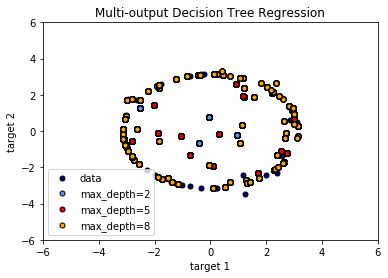

In [17]:
# 创建一个随机种子
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# 训练模型
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# 预测
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# 输出结果图像
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

通过控制决策树的层数来防止过拟合